<a href="https://colab.research.google.com/github/FelixSchmid/ML_exercises/blob/master/Gaussian_Mixture_Model_np_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy implementation of a Gaussian Mixture Model
Felix Schmid, 13.10.19


In [0]:
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import math


## Generating the data

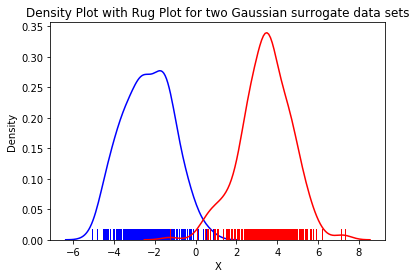

In [0]:
X, y = make_blobs(
    n_samples=500, n_features=1,
    centers=2, cluster_std=1.2, center_box = [-5,5])

set1 = X[y == 0]
set2 = X[y == 1]
# Density Plot for set1
sns.distplot(set1, hist = False, kde = True, rug = True,
             color = 'blue', 
             rug_kws={'color': 'blue'})
# Plot set 2
sns.distplot(set2, hist = False, kde = True, rug = True,
             color = 'red', 
             rug_kws={'color': 'red'})
# Plot formatting
plt.title('Density Plot with Rug Plot for two Gaussian surrogate data sets')
plt.xlabel('X')
plt.ylabel('Density')
plt.show()

## Gaussian Mixture Model for one dimension

In [0]:
def gaussian_mixture_model(X, mus, sigmas, pis, max_iterations, tolerance):
    
    # Definition of helping variables
    N = X.shape[0]
    k = len(pis)
    log_likelihood = 0
    for it in range(max_iterations):
        print("\nIter: " + str(it+1))
           
        # Expectation step: Soft assignment of the source distribution for each x_i:
        ws = np.zeros((N, k))
        for j in range(k):
            for i in range(N):
                ws[i,j] = pis[j] * norm.pdf(X[i], mus[j], sigmas[j])         
        normalizer = ws.sum(axis=1)
        ws[:,0] = np.divide(ws[:,0], normalizer)
        ws[:,1] = np.divide(ws[:,1], normalizer)
        
        # Maximization step: Update of weights, means, and covariance
        pis = np.divide(ws.sum(axis=0), N)
        print('pis: ' + str(pis))
        mus = np.divide((np.multiply(ws,X)).sum(axis=0), ws.sum(axis=0))
        print('mus: ' + str(mus))
        sigmas = np.sqrt(np.divide((np.multiply(ws, np.add(-mus, X)**2)).sum(axis=0), ws.sum(axis=0)))
        print('sigmas: ' + str(sigmas))
        
        # Updating the log likelihood & defining the stop criteria:
        log_likelihood_new = 0.0 
        for i in range(N):
            placeholder = 0
            for j in range(k):
                placeholder = placeholder + pis[j] * norm.pdf(X[i], mus[j], sigmas[j]) 
            log_likelihood_new = log_likelihood_new + np.log(placeholder)
        print('log_likelihood: '+ str(log_likelihood_new))
        if np.abs(log_likelihood_new - log_likelihood) < tolerance:
            break
        log_likelihood = log_likelihood_new
                   
    return mus, sigmas, pis, ws

## Execution of the model

Depending on how we estimate the initial parameters, the GMM converges in more or less steps. 

The parameter tolerance defines at which point the GMM stops iterating. When we choose 0.1 for tolerance the GMM will run until the log_likelihood will not decrease more then 0.1 from the last step. If this is never the case, it will run for the defined max_iterations.

In [0]:
# initialization by naive guess of pis, mus ,and sigmas
in_mus = [-5, 5]
in_sigmas = [3, 3]
in_pis = [0.4, 0.6]   

# using the gmm to estimate on the surrogate data
est_mus, est_sigmas, est_pis, ws = gaussian_mixture_model(X, in_mus, in_sigmas, in_pis, max_iterations= 20, tolerance=0.1)


Iter: 1
pis: [0.43772934 0.56227066]
mus: [-2.36870502  2.81963465]
sigmas: [1.40443131 2.02505619]
log_likelihood: [-1187.58282136]

Iter: 2
pis: [0.45948752 0.54051248]
mus: [-2.43943857  3.0886201 ]
sigmas: [1.17521563 1.70441162]
log_likelihood: [-1161.80567406]

Iter: 3
pis: [0.4767938 0.5232062]
mus: [-2.42177487  3.25537687]
sigmas: [1.14773193 1.4671931 ]
log_likelihood: [-1150.5042875]

Iter: 4
pis: [0.49005999 0.50994001]
mus: [-2.37518196  3.35829262]
sigmas: [1.17236478 1.33293734]
log_likelihood: [-1145.13368866]

Iter: 5
pis: [0.49872463 0.50127537]
mus: [-2.33543673  3.41785388]
sigmas: [1.20345906 1.26106439]
log_likelihood: [-1142.902236]

Iter: 6
pis: [0.50418395 0.49581605]
mus: [-2.3071066   3.45239377]
sigmas: [1.22890563 1.22226091]
log_likelihood: [-1142.02248549]

Iter: 7
pis: [0.50763375 0.49236625]
mus: [-2.288133    3.47318616]
sigmas: [1.24693885 1.19995229]
log_likelihood: [-1141.67243795]

Iter: 8
pis: [0.50981991 0.49018009]
mus: [-2.27575714  3.48600947

## Final pdf shapes and values

The final parameters are close to the original ones:

In [0]:
print('\nfinal estimated mus: ' + str(est_mus))
print('final estimated sigmas: ' + str(est_sigmas))
print('final estimated pis: ' + str(est_pis))

est_y = np.round(ws[:,1])
acc = (1*(est_y==y)).sum(axis=0)/len(y)
print('final accuracy of class prediction: '+ str(acc))


final estimated mus: [-2.26777736  3.49401567]
final estimated sigmas: [1.26690754 1.17827218]
final estimated pis: [0.51120711 0.48879289]
final accuracy of class prediction: 0.984


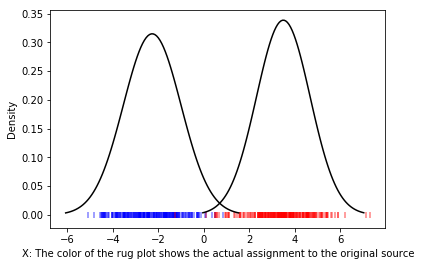

In [0]:
for i in range(len(est_mus)):
    color = ['blue', 'red']
    mu = est_mus[i]
    sigma = est_sigmas[i]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), c='black')
    plt.scatter(X[y == i], np.zeros(len(X[y == i])),c=color[i], alpha=0.5, marker='|')
plt.xlabel('X: The color of the rug plot shows the actual assignment to the original source')
plt.ylabel('Density')
plt.show()

The density plots of the original data looks similair to the estimated density plots. When rounding the assigned pobability of each x_i and hard assigning each x_i to one distribution, the accuracy is 98.4%.